# Projeto das Bandeiras

Projeto do livro Pandas Python Data Wrangling Para Ciencia De Dados de Eduardo Corrêa

In [20]:
!pip install -U scikit-learn

  Using cached scipy-1.14.1-cp313-cp313-win_amd64.whl.metadata (60 kB)
  Using cached joblib-1.4.2-py3-none-any.whl.metadata (5.4 kB)
  Using cached threadpoolctl-3.5.0-py3-none-any.whl.metadata (13 kB)
   ---------------------------------------- 0.0/11.1 MB ? eta -:--:--
   -- ------------------------------------- 0.8/11.1 MB 10.1 MB/s eta 0:00:02
   ------------- -------------------------- 3.7/11.1 MB 11.8 MB/s eta 0:00:01
   ----------------------- ---------------- 6.6/11.1 MB 12.8 MB/s eta 0:00:01
   --------------------------------- ------ 9.2/11.1 MB 12.8 MB/s eta 0:00:01
   -------------------------------------- - 10.7/11.1 MB 11.8 MB/s eta 0:00:01
   ---------------------------------------- 11.1/11.1 MB 10.9 MB/s eta 0:00:00
Using cached joblib-1.4.2-py3-none-any.whl (301 kB)
Using cached scipy-1.14.1-cp313-cp313-win_amd64.whl (44.5 MB)
Using cached threadpoolctl-3.5.0-py3-none-any.whl (18 kB)


### Importando as bibliotecas

In [21]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier

### Importando a base de dados

In [2]:
flags = pd.read_csv('data/flags.csv')
countries = pd.read_csv('data/countries.csv')

flags.head()

### Verificando as cores

In [3]:
#separa as cores
verde = flags['green']
amarelo = flags['gold']
azul = flags['blue']
branco = flags['white']
soma = verde + amarelo + azul + branco

In [4]:
#gera vetor booleano com True para quem tem as 4 cores
tem_todas = (soma == 4)

In [5]:
print('Países com todas as cores: ')
print(flags[tem_todas.values]['name'])

Países com todas as cores: 
17                       Belize
19                      Bermuda
23                       Brazil
24         British-Virgin-Isles
26                     Bulgaria
33               Cayman-Islands
34     Central-African-Republic
48                     Dominica
56           Falklands-Malvinas
57                         Fiji
71                         Guam
78                    Hong-Kong
116                  Montserrat
135                     Parguay
139                    Portugal
142                     Romania
151             Soloman-Islands
158                   St-Helena
161                  St-Vincent
176         Turks-Cocos-Islands
182             US-Virgin-Isles
187                   Venezuela
Name: name, dtype: object


### Obter as propriedades básicas de cada atributo

In [6]:
i=0

for c in flags.columns:
    i +=1
    att = flags[c] #atributo
    att_dtype = att.dtype #dtype
    att_tam_dominio = att.unique().size #tamanho do domínio
    att_tem_nulo = any(att.isnull()) #possui valor nulo?
 
    if (att_tam_dominio < 8):
        print("("+str(i)+") atributo:", c, "\t",
            "dtype:", att_dtype, "\t",
            "nulos: ", att_tem_nulo, "\n",
            "domínio:", att.unique())
    else:
        if (att_dtype=='object'):
            print("("+str(i)+") atributo:", c, "\t",
                "dtype:", att_dtype, "\t",
                "nulos: ", att_tem_nulo, "\n",
                "domínio (primeiros elementos):", att.unique()[0:8])
        else:
            print("("+str(i)+") atributo:", c, "\t",
                "dtype:", att_dtype, "\t",
                "nulos: ", att_tem_nulo, "\n",
                "min: ", att.min(), "\t",
                "max: ", att.max(), "\t",
                "média: ", round(att.mean(),2), "\t",
                "d.p.: ", round(att.std(),2))

(1) atributo: name 	 dtype: object 	 nulos:  False 
 domínio (primeiros elementos): ['Afghanistan' 'Albania' 'Algeria' 'American-Samoa' 'Andorra' 'Angola'
 'Anguilla' 'Antigua-Barbuda']
(2) atributo: landmass 	 dtype: int64 	 nulos:  False 
 domínio: [5 3 4 6 1 2]
(3) atributo: zone 	 dtype: int64 	 nulos:  False 
 domínio: [1 3 2 4]
(4) atributo: area 	 dtype: int64 	 nulos:  False 
 min:  0 	 max:  22402 	 média:  700.05 	 d.p.:  2170.93
(5) atributo: population 	 dtype: int64 	 nulos:  False 
 min:  0 	 max:  1008 	 média:  23.27 	 d.p.:  91.93
(6) atributo: language 	 dtype: int64 	 nulos:  False 
 min:  1 	 max:  10 	 média:  5.34 	 d.p.:  3.5
(7) atributo: religion 	 dtype: int64 	 nulos:  False 
 min:  0 	 max:  7 	 média:  2.19 	 d.p.:  2.06
(8) atributo: bars 	 dtype: int64 	 nulos:  False 
 domínio: [0 2 3 1 5]
(9) atributo: stripes 	 dtype: int64 	 nulos:  False 
 min:  0 	 max:  14 	 média:  1.55 	 d.p.:  2.33
(10) atributo: colours 	 dtype: int64 	 nulos:  False 
 min:  1 

### Gerar a tabela de frequências

In [7]:
df_cores = pd.DataFrame()

for c in flags.columns:
    if c in ['red','green','blue','gold','white','black','orange']:
        df_cores[c]=flags[c].value_counts()

print(df_cores)

     red  green  blue  gold  white  black  orange
red                                              
1    153     91    99    91    146     52      26
0     41    103    95   103     48    142     168


### Gerar os gráficos de barras

In [8]:
df_cores

,red,green,blue,gold,white,black,orange
red,,,,,,,
1,153,91,99,91,146,52,26
0,41,103,95,103,48,142,168


array([<Axes: title={'center': 'red'}, ylabel='red'>,
       <Axes: title={'center': 'green'}, ylabel='red'>,
       <Axes: title={'center': 'blue'}, ylabel='red'>,
       <Axes: title={'center': 'gold'}, ylabel='red'>,
       <Axes: title={'center': 'white'}, ylabel='red'>,
       <Axes: title={'center': 'black'}, ylabel='red'>,
       <Axes: title={'center': 'orange'}, ylabel='red'>], dtype=object)

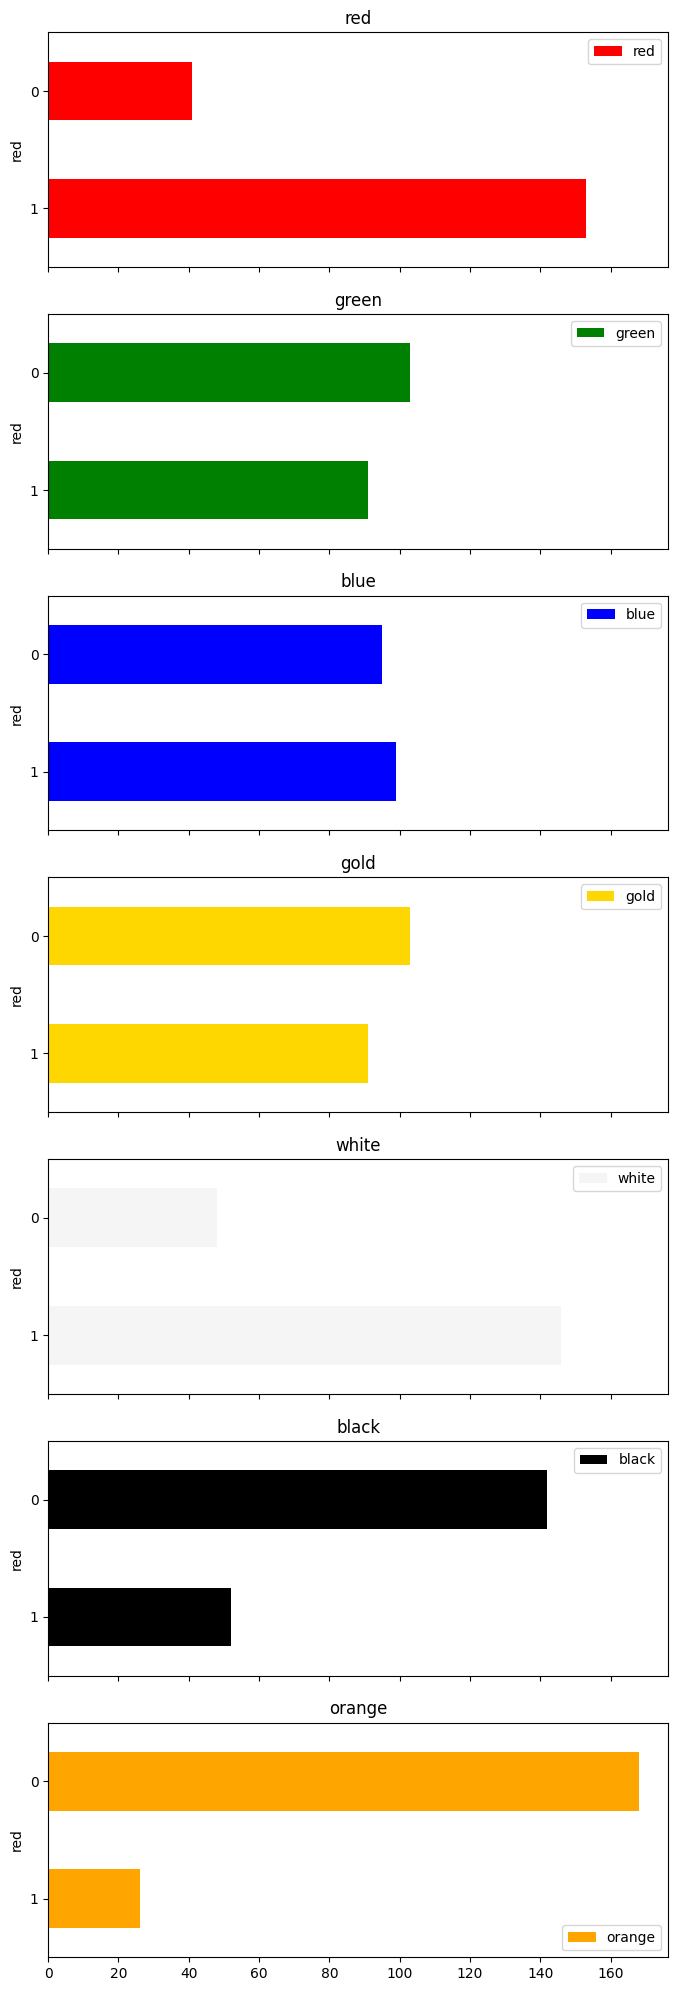

In [9]:
lst_cores = [['red','beige'],
             ['green','beige'],
             ['blue','beige'],
             ['gold','beige'],
             ['whitesmoke','beige'],
             ['black','beige'],
             ['orange','beige']]

cores = [cor[0] for cor in lst_cores] 
df_cores.plot(kind='barh', subplots=True, figsize=(8,25), color=cores)

### Combinando os datasets flags e countries


In [10]:
num_linhas_flags = flags.shape[0]
num_linhas_countries = countries.shape[0]

### Realiza a junção entre os DataFrames

In [11]:
# Junção Interna: países comuns a ambas as bases
ambas = pd.merge(flags, countries,
 how="inner",
 left_on="name", right_on="country")

num_linhas_ambas = ambas.shape[0]

In [12]:
# Left Join: países apenas em flags
so_flags = pd.merge(flags, countries,
 how="left",
 left_on="name", right_on="country")

so_flags = so_flags[pd.isnull(so_flags['country'])==True]
num_linhas_so_flags = so_flags.shape[0]

In [13]:
# Right Join: países apenas em countries
so_countries = pd.merge(flags, countries,
 how="right",
 left_on="name", right_on="country")

so_countries = so_countries[pd.isnull(so_countries['name'])==True]
num_linhas_so_countries = so_countries.shape[0]

### Imprimir os resultados

In [14]:
print('- Num países em "flags":', num_linhas_flags)
print('- Num países em "countries":', num_linhas_countries)
print('- Num países em ambas:', num_linhas_ambas)
print('- Num países só em "flags":', num_linhas_so_flags)
print('- Num países só em "countries":', num_linhas_so_countries)
print('------------------------------')
print("países só em flags:")
print(so_flags['name'])
print('------------------------------')
print("países só em countries:")
print(so_countries['country'])

- Num países em "flags": 194
- Num países em "countries": 227
- Num países em ambas: 177
- Num países só em "flags": 17
- Num países só em "countries": 50
------------------------------
países só em flags:
9               Argentine
56     Falklands-Malvinas
65            Germany-FRG
88            Ivory-Coast
92              Kampuchea
103              Malagasy
109              Marianas
127                  Niue
135               Parguay
155           South-Yemen
163               Surinam
182       US-Virgin-Isles
184                  USSR
186          Vatican-City
189         Western-Samoa
190            Yugoslavia
191                 Zaire
Name: name, dtype: object
------------------------------
países só em countries:
9                  Armenia
10                   Aruba
13              Azerbaijan
18                 Belarus
25      Bosnia-Herzegovina
34                Cambodia
46     Congo-Repub. of the
49           Cote d'Ivoire
50                 Croatia
58              East Timor
6

#### Grupo 1 — categóricos binários: red , green , blue , gold , white , black , orange , crescent , triangle , icon , animate , text ;

#### Grupo 2 — categóricos não binários: name , landmass , zone , language , religion , mainhue , topleft , botright ;

#### Grupo 3 — numéricos contínuos: area , population ;

#### Grupo 4 — numéricos discretos: bars , stripes , colours , circles , crosses , saltires , quarters , sunstars ;

### Conversão dos atributos do Grupo 2 - De: Categóricos não binários Para: Categóricos binários

In [15]:
for c in flags.columns:
    if c in ['landmass', 'zone', 'language', 'religion', 'mainhue', 'topleft', 'botright']:
        dummies = pd.get_dummies(flags[c], prefix=c)
        flags = flags.join(dummies)

### Normalização dos atributos dos Grupo 3 e 4 - De: Numéricos contínuos e discretos Para: Numéricos com valores na faixa entre 0 e 1

In [16]:
for c in flags.columns:
    if c in ['area', 'population', 'bars', 'stripes', 'colours', 'circles', 'crosses', 'saltires', 'quarters', 'sunstars']:
        c_max = max(flags[c])
        c_min = min(flags[c])
        flags[c] = (flags[c] - c_min) / (c_max - c_min)

### Exclusão dos atributos indesejados

In [17]:
flags = flags.drop(columns=['name', 'landmass',
 'zone', 'language',
 'religion', 'mainhue',
 'topleft', 'botright',
 ])

### Imprime a configuração final de flags

In [18]:
print('head():')
print(flags.head())
print('-----------------------------------------------')
#imprime as últimas linhas
print('tail():')
print(flags.tail())
print('-----------------------------------------------')

head():
       area  population  bars   stripes   colours  red  green  blue  gold  \
0  0.028926    0.015873   0.0  0.214286  0.571429    1      1     0     1   
1  0.001295    0.002976   0.0  0.000000  0.285714    1      0     0     1   
2  0.106598    0.019841   0.4  0.000000  0.285714    1      1     0     0   
3  0.000000    0.000000   0.0  0.000000  0.571429    1      0     1     1   
4  0.000000    0.000000   0.6  0.000000  0.285714    1      0     1     1   

   white  ...  topleft_red  topleft_white  botright_black  botright_blue  \
0      1  ...        False          False           False          False   
1      0  ...         True          False           False          False   
2      1  ...        False          False           False          False   
3      1  ...        False          False           False          False   
4      0  ...        False          False           False          False   

   botright_brown  botright_gold  botright_green  botright_orange  \
0  

### Salva o dataset alterado para um arquivo

In [19]:
flags.to_csv("data/flags_transf.csv", sep=",", index=False)

### Carrega a base de dados de treinamento para um DataFrame

In [22]:
flags = pd.read_csv('data/flags_transf.csv')

### Configura os parâmetros e variáveis auxiliares 

In [23]:
#valor de k a ser usado no k-nn
k = 3

#nomes dos labels (rótulos de classe)
labels = ['red', 'green', 'blue', 'gold', 'white', 'black', 'orange']

#número de labels (=7)
q = len(labels)

#número de registros da base de treinamento (=194)
N = flags.shape[0]

### Cria um classificador com o algoritmo k-NN e faz a estimativa do desempenho preditivo com o método LOO (Leave-One-Out)

In [26]:
#for j: laço que precorre cada rótulo

for j in range(0,q):
    print('------------------------------------------------')
    print("PROCESSANDO O RÓTULO ", labels[j])
    #---------------------------------------------------------
    #instancia uma matriz de confusão para o rótulo j
    #---------------------------------------------------------
    mc = pd.DataFrame({'predito_nao': [0,0], 'predito_sim':[0,0]}, index = ['real_nao','real_sim'])
    #---------------------------------------------------------
    #divide a base de treinamento verticalmente em duas partes: X (atributos preditivos) e Y (atributo classe)
    #---------------------------------------------------------
    X = flags.drop(columns=labels)
    Y = flags[labels[j]]
    #---------------------------------------------------------
    #for i: laço que realiza o LOO para o rótulo j
    #---------------------------------------------------------
    for i in range(0,N):
        #-----------------------------------------------------
        #Separa os dados que serão utilizados para treinar o modelo
        #-----------------------------------------------------
        X_treino = X.drop([i])
        Y_treino = Y.drop([i])
        #-----------------------------------------------------
        #Separa o objeto de teste
        #-----------------------------------------------------
        X_teste = X.iloc[[i],:]
        Y_teste = Y.iloc[i]
        #-----------------------------------------------------
        #Treinamento do modelo k-NN com os dados de treino
        #-----------------------------------------------------
        modelo=KNeighborsClassifier(n_neighbors=k)
        modelo.fit(X_treino,Y_treino)
        #-----------------------------------------------------
        #Teste do modelo k-NN com o objeto de teste
        #-----------------------------------------------------
        pred = modelo.predict(X_teste)
        #-----------------------------------------------------
        #Atualiza a célula adequada da matriz de confusão em função do resultado do teste
        #-----------------------------------------------------
        if (Y_teste == 0):
            if (pred == 0): mc.iloc[0,0]+=1
            if (pred == 1): mc.iloc[0,1]+=1
        else:
            if (pred == 0): mc.iloc[1,0]+=1
            if (pred == 1): mc.iloc[1,1]+=1
    #---------------------------------------------------------
    #Fim do LOO para o rótulo j: imprime a sua matriz de confusão e acurácia
    #---------------------------------------------------------
    print(mc)
    acuracia = (mc.iloc[0,0] + mc.iloc[1,1]) / N
    print('acurácia = ',round(acuracia,2))

------------------------------------------------
PROCESSANDO O RÓTULO  red
          predito_nao  predito_sim
real_nao           20           21
real_sim           22          131
acurácia =  0.78
------------------------------------------------
PROCESSANDO O RÓTULO  green
          predito_nao  predito_sim
real_nao           88           15
real_sim           17           74
acurácia =  0.84
------------------------------------------------
PROCESSANDO O RÓTULO  blue
          predito_nao  predito_sim
real_nao           64           31
real_sim           28           71
acurácia =  0.7
------------------------------------------------
PROCESSANDO O RÓTULO  gold
          predito_nao  predito_sim
real_nao           81           22
real_sim           37           54
acurácia =  0.7
------------------------------------------------
PROCESSANDO O RÓTULO  white
          predito_nao  predito_sim
real_nao           18           30
real_sim           24          122
acurácia =  0.72
-----------